In [7]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Opens an image with cv2
img = cv2.imread('/content/IMG_20230507_020615_499.jpg')

In [3]:
# Apply some Gaussian blur on the image
img_gb = cv2.GaussianBlur(img, (7, 7) ,0)
# Apply some Median blur on the image
img_mb = cv2.medianBlur(img_gb, 5)
# Apply a bilateral filer on the image
img_bf = cv2.bilateralFilter(img_mb, 5, 80, 80)

Text(0.5, 1.0, 'Second')

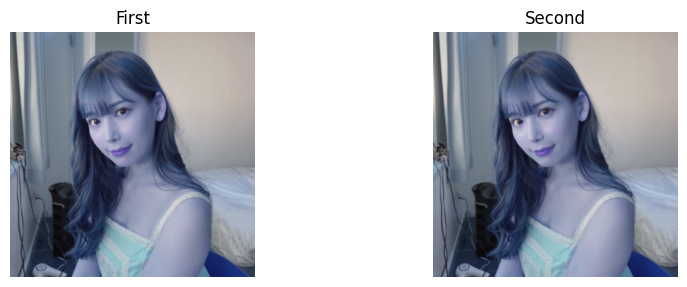

In [11]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img_gb)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img_mb)
plt.axis('off')
plt.title("Second")


In [12]:
# Use the laplace filter to detect edges
img_lp_im = cv2.Laplacian(img, cv2.CV_8U, ksize=5)
img_lp_gb = cv2.Laplacian(img_gb, cv2.CV_8U, ksize=5)
img_lp_mb = cv2.Laplacian(img_mb, cv2.CV_8U, ksize=5)
img_lp_al = cv2.Laplacian(img_bf, cv2.CV_8U, ksize=5)

Text(0.5, 1.0, 'gussian blur ')

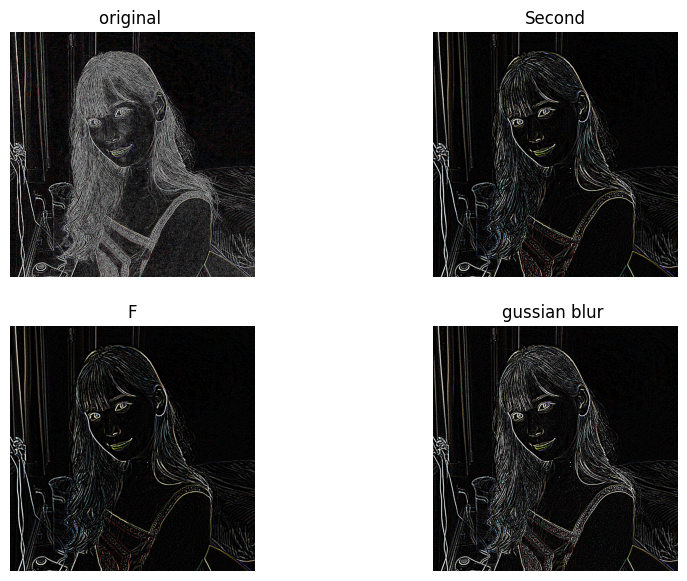

In [16]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img_lp_im)
plt.axis('off')
plt.title("original ")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  # showing image
plt.imshow(img_lp_mb)
plt.axis('off')
plt.title("Second")
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(img_lp_al)
plt.axis('off')
plt.title("F")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(img_lp_gb)
plt.axis('off')
plt.title("gussian blur ")

In [17]:
# Convert the image to greyscale (1D)
img_lp_im_grey = cv2.cvtColor(img_lp_im, cv2.COLOR_BGR2GRAY)
img_lp_gb_grey = cv2.cvtColor(img_lp_gb, cv2.COLOR_BGR2GRAY)
img_lp_mb_grey = cv2.cvtColor(img_lp_mb, cv2.COLOR_BGR2GRAY)
img_lp_al_grey = cv2.cvtColor(img_lp_al, cv2.COLOR_BGR2GRAY)

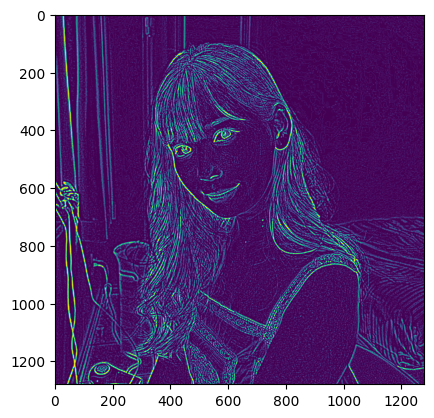

In [20]:
plt.imshow(img_lp_gb_grey)

In [21]:
# Manual image thresholding
_, EdgeImage = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [22]:
# Remove some additional noise
blur_im = cv2.GaussianBlur(img_lp_im_grey, (5, 5), 0)
blur_gb = cv2.GaussianBlur(img_lp_gb_grey, (5, 5), 0)
blur_mb = cv2.GaussianBlur(img_lp_mb_grey, (5, 5), 0)
blur_al = cv2.GaussianBlur(img_lp_al_grey, (5, 5), 0)
# Apply a threshold (Otsu)
_, tresh_im = cv2.threshold(blur_im, 245, 255,cv2.THRESH_BINARY +  cv2.THRESH_OTSU)
_, tresh_gb = cv2.threshold(blur_gb, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_mb = cv2.threshold(blur_mb, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_al = cv2.threshold(blur_al, 245, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

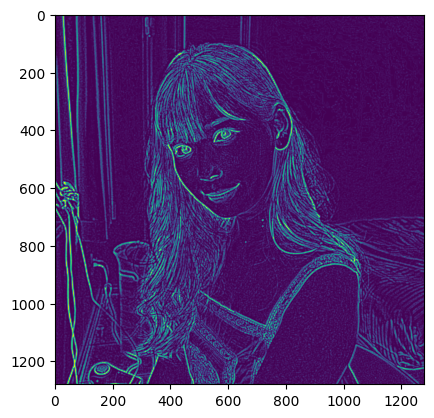

In [24]:
plt.imshow(blur_gb)

In [25]:
# Invert the black and the white
inverted_original = cv2.subtract(255, tresh_im)
inverted_GaussianBlur = cv2.subtract(255, tresh_gb)
inverted_MedianBlur = cv2.subtract(255, tresh_mb)
inverted_Bilateral = cv2.subtract(255, tresh_al)

Text(0.5, 1.0, 'median blur  ')

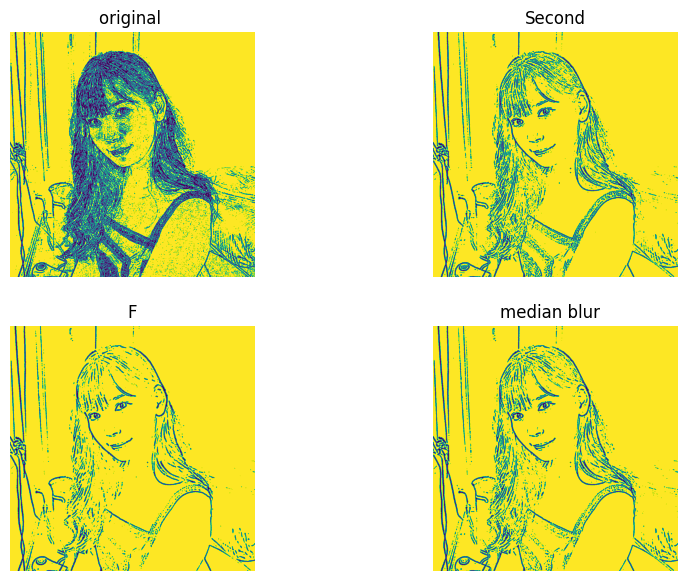

In [28]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(inverted_original)
plt.axis('off')
plt.title("original ")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  # showing image
plt.imshow(inverted_GaussianBlur)
plt.axis('off')
plt.title("Second")
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(inverted_Bilateral)
plt.axis('off')
plt.title("F")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(inverted_MedianBlur)
plt.axis('off')
plt.title("median blur  ")

In [29]:
# Reshape the image
img_reshaped = img.reshape((-1,3))
# convert to np.float32
img_reshaped = np.float32(img_reshaped)
# Set the Kmeans criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set the amount of K (colors)
K = 8
# Apply Kmeans
_, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Covert it back to np.int8
center = np.uint8(center)
res = center[label.flatten()]
# Reshape it back to an image
img_Kmeans = res.reshape((img.shape))

In [30]:
# Reduce the colors of the original image
div = 64
img_bins = img // div * div + div // 2

In [31]:
# Convert the mask image back to color
inverted_Bilateral = cv2.cvtColor(inverted_Bilateral, cv2.COLOR_GRAY2RGB)
# Combine the edge image and the binned image
cartoon_Bilateral = cv2.bitwise_and(inverted_Bilateral, img_bins)
# Save the image
cv2.imwrite('CartoonImage.png', cartoon_Bilateral)

True

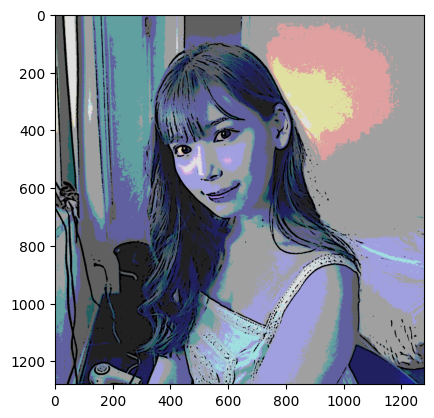

In [32]:
plt.imshow(cartoon_Bilateral)